## Data Preprocessing

In [7]:
import pandas as pd

# Load the dataset to examine its structure and contents
file_path = 'Annual GDP.csv'
gdp_data = pd.read_csv(file_path)

# Display the first few rows and general info about the dataset
gdp_data.head(), gdp_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     object 
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 900.0+ bytes


(   Year Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
 0  2023                       15,108,806                    5.6   
 1  2022                       13,489,642                    4.9   
 2  2021                       12,027,662                    7.6   
 3  2020                       10,715,070                   -0.3   
 4  2019                       10,237,727                    5.1   
 
   Real GDP prices (Ksh Million)  
 0                    10,399,980  
 1                     9,852,583  
 2                     9,395,942  
 3                     8,733,060  
 4                     8,756,946  ,
 None)

In [9]:
# Remove commas and convert the GDP columns to numeric types
gdp_data['Nominal GDP prices (Ksh Million)'] = gdp_data['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
gdp_data['Real GDP prices (Ksh Million)'] = gdp_data['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Confirm changes by displaying the updated data types and first few rows
gdp_data.head(), gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              24 non-null     int64  
 1   Nominal GDP prices (Ksh Million)  24 non-null     float64
 2   Annual GDP growth (%)             24 non-null     float64
 3   Real GDP prices (Ksh Million)     24 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 900.0 bytes


(   Year  Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
 0  2023                        15108806.0                    5.6   
 1  2022                        13489642.0                    4.9   
 2  2021                        12027662.0                    7.6   
 3  2020                        10715070.0                   -0.3   
 4  2019                        10237727.0                    5.1   
 
    Real GDP prices (Ksh Million)  
 0                     10399980.0  
 1                      9852583.0  
 2                      9395942.0  
 3                      8733060.0  
 4                      8756946.0  ,
 None)

## visualizing trends in GDP over time

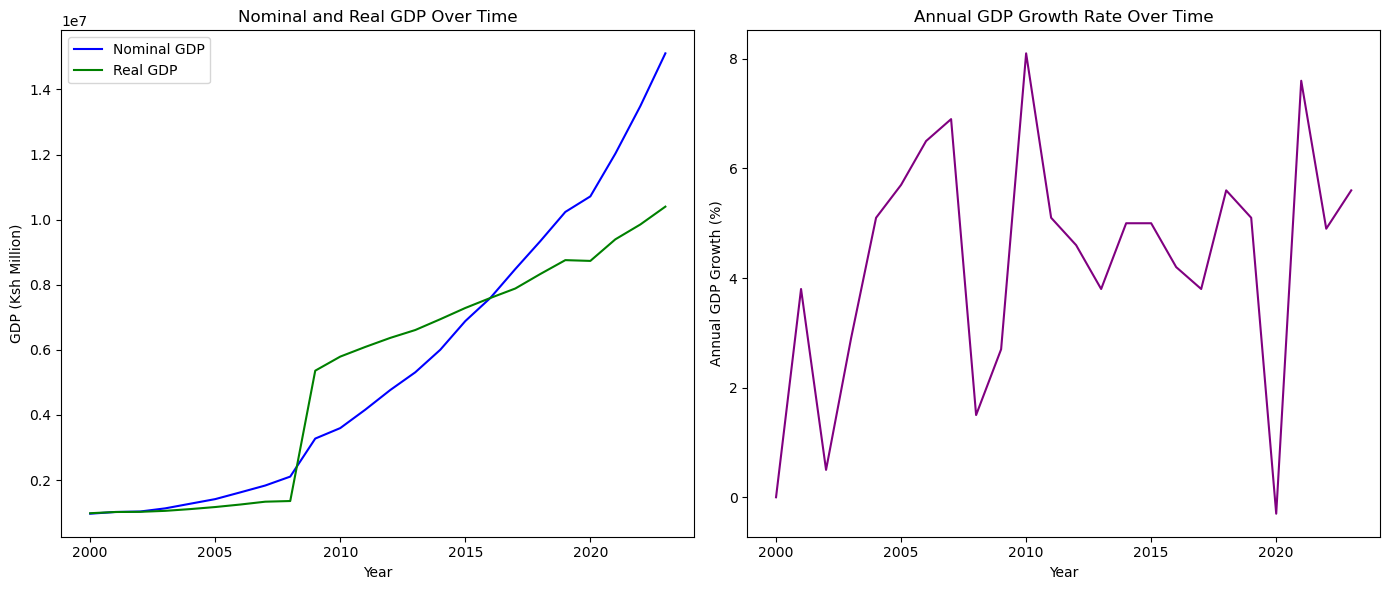

In [23]:
import matplotlib.pyplot as plt

# Set up the figure and axes for multiple plots
plt.figure(figsize=(14, 6))

# Plot Nominal and Real GDP over time
plt.subplot(1, 2, 1)
plt.plot(gdp_data['Year'], gdp_data['Nominal GDP prices (Ksh Million)'], label="Nominal GDP", color="blue")
plt.plot(gdp_data['Year'], gdp_data['Real GDP prices (Ksh Million)'], label="Real GDP", color="green")
plt.xlabel("Year")
plt.ylabel("GDP (Ksh Million)")
plt.title("Nominal and Real GDP Over Time")
plt.legend()

# Plot Annual GDP growth rate over time
plt.subplot(1, 2, 2)
plt.plot(gdp_data['Year'], gdp_data['Annual GDP growth (%)'], color="purple")
plt.xlabel("Year")
plt.ylabel("Annual GDP Growth (%)")
plt.title("Annual GDP Growth Rate Over Time")

plt.tight_layout()
plt.show()

Nominal and Real GDP Over Time: This plot shows the increasing trend in both nominal and real GDP over the years, with nominal GDP (in blue) generally higher than real GDP (in green) due to inflation.

Annual GDP Growth Rate Over Time: This plot reveals fluctuations in GDP growth. There are noticeable peaks and troughs, indicating periods of rapid economic growth and potential economic challenges.

## Feature engineering

In [27]:
# Create lagged features and moving averages for GDP data

# Add lagged features for Nominal GDP and Real GDP (previous year's GDP values)
gdp_data['Nominal GDP Lag 1'] = gdp_data['Nominal GDP prices (Ksh Million)'].shift(1)
gdp_data['Real GDP Lag 1'] = gdp_data['Real GDP prices (Ksh Million)'].shift(1)

# Add a 3-year moving average for Annual GDP Growth
gdp_data['GDP Growth 3-Year MA'] = gdp_data['Annual GDP growth (%)'].rolling(window=3).mean()

# Drop rows with NaN values (from shifting and rolling operations)
gdp_data.dropna(inplace=True)

# Display the resulting DataFrame with the new features
gdp_data.head()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million),Nominal GDP Lag 1,Real GDP Lag 1,GDP Growth 3-Year MA
2,2021,12027662.0,7.6,9395942.0,13489642.0,9852583.0,6.033333
3,2020,10715070.0,-0.3,8733060.0,12027662.0,9395942.0,4.066667
4,2019,10237727.0,5.1,8756946.0,10715070.0,8733060.0,4.133333
5,2018,9340307.0,5.6,8330891.0,10237727.0,8756946.0,3.466667
6,2017,8483396.0,3.8,7885521.0,9340307.0,8330891.0,4.833333


In [31]:
# Import necessary libraries
import pandas as pd

# Load your dataset
gdp_data = pd.read_csv('Annual GDP.csv')

# Remove commas and convert the GDP columns to numeric types
gdp_data['Nominal GDP prices (Ksh Million)'] = gdp_data['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
gdp_data['Real GDP prices (Ksh Million)'] = gdp_data['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

# Add lagged features for Nominal GDP and Real GDP
gdp_data['Nominal GDP Lag 1'] = gdp_data['Nominal GDP prices (Ksh Million)'].shift(1)
gdp_data['Real GDP Lag 1'] = gdp_data['Real GDP prices (Ksh Million)'].shift(1)

# Add a 3-year moving average for Annual GDP Growth
gdp_data['GDP Growth 3-Year MA'] = gdp_data['Annual GDP growth (%)'].rolling(window=3).mean()

# Drop rows with NaN values (from shifting and rolling operations)
gdp_data.dropna(inplace=True)

# Display the resulting DataFrame to verify the new features
print(gdp_data.head())

   Year  Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
2  2021                        12027662.0                    7.6   
3  2020                        10715070.0                   -0.3   
4  2019                        10237727.0                    5.1   
5  2018                         9340307.0                    5.6   
6  2017                         8483396.0                    3.8   

   Real GDP prices (Ksh Million)  Nominal GDP Lag 1  Real GDP Lag 1  \
2                      9395942.0         13489642.0       9852583.0   
3                      8733060.0         12027662.0       9395942.0   
4                      8756946.0         10715070.0       8733060.0   
5                      8330891.0         10237727.0       8756946.0   
6                      7885521.0          9340307.0       8330891.0   

   GDP Growth 3-Year MA  
2              6.033333  
3              4.066667  
4              4.133333  
5              3.466667  
6              4.833333  


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define high growth as 5% or above, low growth as below 5%
gdp_data['Growth Class'] = gdp_data['Annual GDP growth (%)'].apply(lambda x: 1 if x >= 5 else 0)

# Features: using lagged Nominal GDP, Real GDP, and moving average
X = gdp_data[['Nominal GDP Lag 1', 'Real GDP Lag 1', 'GDP Growth 3-Year MA']]
y = gdp_data['Growth Class']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



Here’s a breakdown of the metrics:

- **Precision**:
  - Class 0 ("Low Growth"): 0.75 – Good at identifying low-growth years but with some false positives.
  - Class 1 ("High Growth"): 0.33 – Higher false positive rate for high-growth years.

- **Recall**:
  - Class 0 ("Low Growth"): 0.60 – 60% of the actual low-growth years are correctly identified.
  - Class 1 ("High Growth"): 0.50 – Only half of the actual high-growth years are captured.

The accuracy of 0.57 reflects a model that has room for improvement.